In [7]:
#import required modules
!pip install pandas
!pip install sklearn
!pip install matplot
!pip install tensorflow
!pip install keras

In [8]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
features = ['X1', 'X2', 'X3', 'X4']
target = 'Y'

def seconds_to_str(seconds):
    min, sec = divmod(seconds, 60)
    hour, min = divmod(min, 60)
    return "%d:%02d:%02d" % (hour, min, sec)

In [3]:
#read train data sets
train_data_sets = pd.read_csv('CH22_Demand_XY_Train.csv', converters= {'DateTime': pd.to_datetime})
train_data_sets['DateTime'] = train_data_sets['DateTime'].dt.hour
train_data_sets

,DateTime,X1,X2,X3,X4,Y
0,0,2.186333,13.76,0.0663,0.1547,521163.83540
1,0,2.138000,13.90,0.0910,0.1105,449066.62018
2,0,2.104333,13.90,0.0806,0.1300,437394.72159
3,0,2.040333,14.00,0.1183,0.1248,422107.63292
4,0,1.973667,14.14,0.0624,0.1105,406923.83540
...,...,...,...,...,...,...
41927,3,5.856667,17.66,0.1092,0.1391,365929.91028
41928,4,5.860000,17.66,0.1183,0.1495,368822.51417
41929,4,5.846667,17.68,0.1001,0.1976,373857.78769
41930,4,5.856667,17.66,0.1183,0.1391,373536.38739


In [4]:
#read test data sets
test_data_sets = pd.read_csv('CH22_Demand_raw_X_Test.csv', converters= {'DateTime': pd.to_datetime})
test_data_sets['DateTime'] = test_data_sets['DateTime'].dt.hour
test_data_sets

,DateTime,X1,X2,X3,X4
0,4,5.943333,17.72,0.1001,0.1690
1,4,5.990000,17.68,0.1092,0.1872
2,5,5.993333,17.66,0.1235,0.1014
3,5,6.000000,17.68,0.0949,0.1690
4,5,6.013333,17.68,0.1326,0.1300
...,...,...,...,...,...
10479,23,2.336667,13.48,0.0520,0.1248
10480,23,2.315667,13.52,0.0663,0.1209
10481,23,2.300000,13.56,0.1092,0.0962
10482,23,2.252667,13.60,0.0858,0.1157


In [5]:
#option1: train modules for each hour; you can skip this part if you have trained files
start_time = time.time()
models = []
scalers_x = []
scalers_y = []
print("start")
for i in range(24):
  train_data_set = train_data_sets[train_data_sets['DateTime'] == i]
  
  train_x = train_data_set[features].values.reshape(-1, len(features))
  train_y = train_data_set[target].values.reshape(-1,len(target))

  scaler_x = MinMaxScaler(feature_range=(0,1))
  scaler_y = MinMaxScaler(feature_range=(0,1))
  scaled_x = scaler_x.fit_transform(train_x)
  scaled_y = scaler_y.fit_transform(train_y)

  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=(scaled_x.shape[1],1)))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50))
  model.add(Dropout(0.2))
  model.add(Dense(units=1))

  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(scaled_x, scaled_y, epochs=1200, batch_size=32, verbose=False)
  models.append(model)
  scalers_x.append(scaler_x)
  scalers_y.append(scaler_y)
  print("{} o'clock done {}".format(i, seconds_to_str(time.time()-start_time)))
print(seconds_to_str(time.time() - start_time))


start
0 o'clock done 0:03:24


KeyboardInterrupt: 

In [19]:
#load model from file
scalers_x = []
scalers_y = []
models = []
for i in range(24):
    train_data_set = train_data_sets[train_data_sets['DateTime'] == i]
    train_x = train_data_set[features].values.reshape(-1, len(features))
    train_y = train_data_set[target].values.reshape(-1,len(target))

    scaler_x = MinMaxScaler(feature_range=(0,1))
    scaler_y = MinMaxScaler(feature_range=(0,1))
    scaled_x = scaler_x.fit_transform(train_x)
    scaled_y = scaler_y.fit_transform(train_y)
    
    models.append(keras.models.load_model(
    "{}.h5".format(i), custom_objects=None, compile=True, options=None))
    scalers_x.append(scaler_x)
    scalers_y.append(scaler_y)

0 o'clock -> r2: 0.833


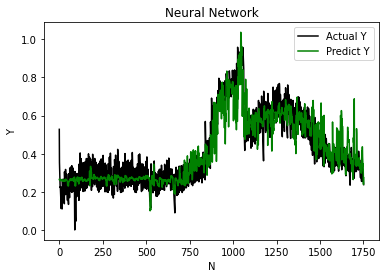

1 o'clock -> r2: 0.859


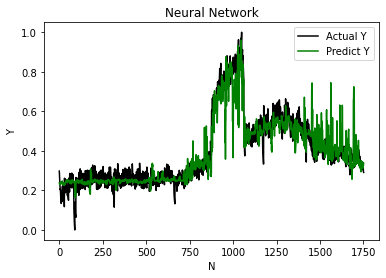

2 o'clock -> r2: 0.886


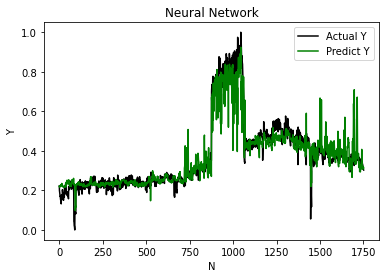

3 o'clock -> r2: 0.865


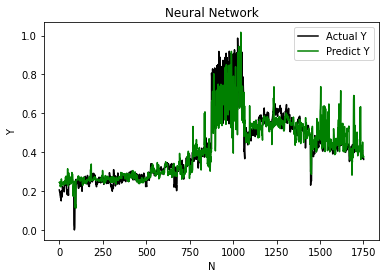

4 o'clock -> r2: 0.843


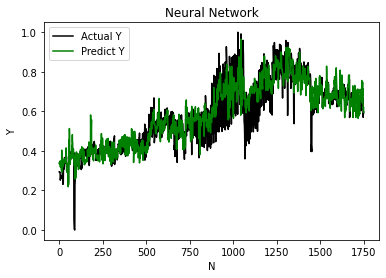

5 o'clock -> r2: 0.579


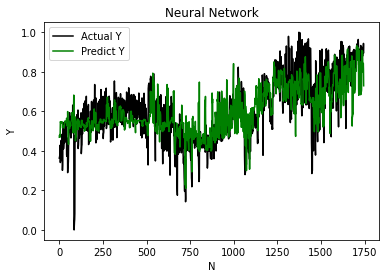

6 o'clock -> r2: 0.732


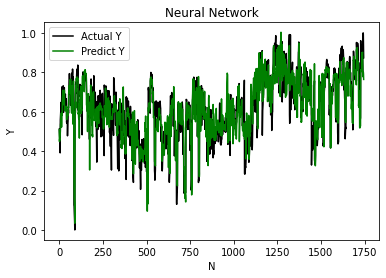

7 o'clock -> r2: 0.849


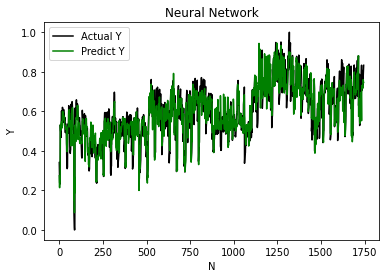

8 o'clock -> r2: 0.883


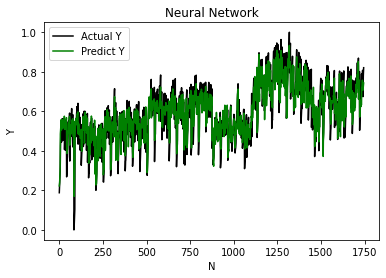

9 o'clock -> r2: 0.880


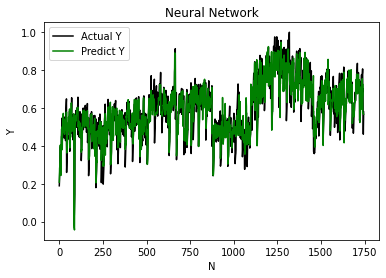

10 o'clock -> r2: 0.889


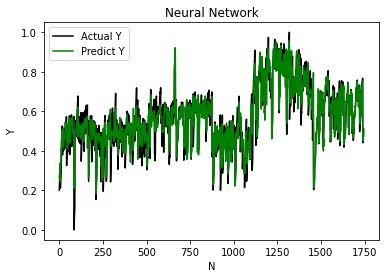

11 o'clock -> r2: 0.896


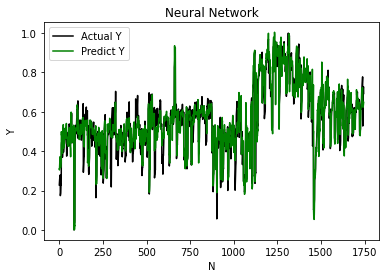

12 o'clock -> r2: 0.870


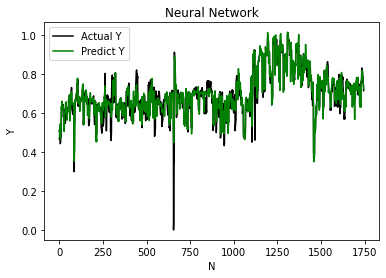

13 o'clock -> r2: 0.879


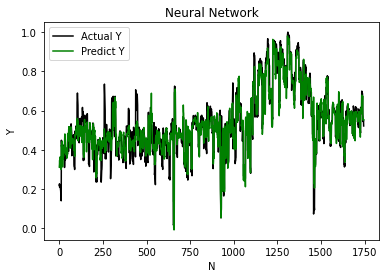

14 o'clock -> r2: 0.892


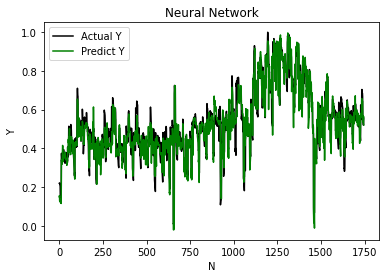

15 o'clock -> r2: 0.930


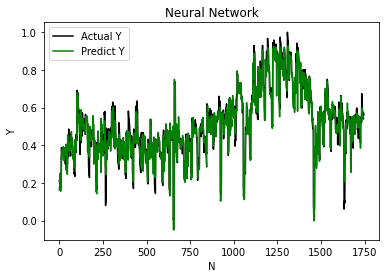

16 o'clock -> r2: 0.876


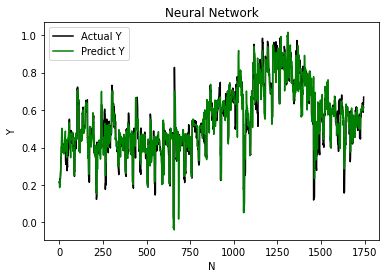

17 o'clock -> r2: 0.851


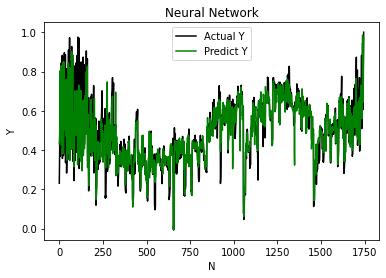

18 o'clock -> r2: 0.906


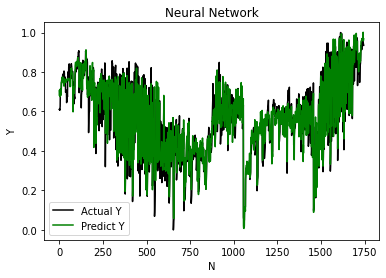

19 o'clock -> r2: 0.847


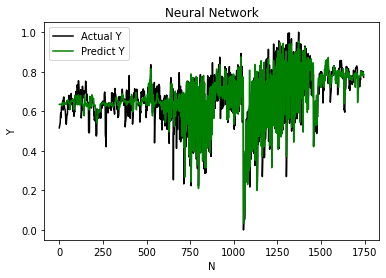

20 o'clock -> r2: 0.796


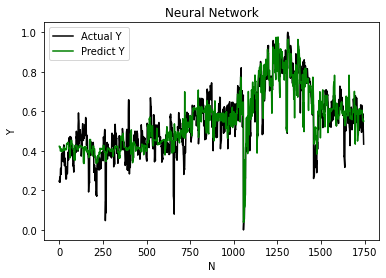

21 o'clock -> r2: 0.816


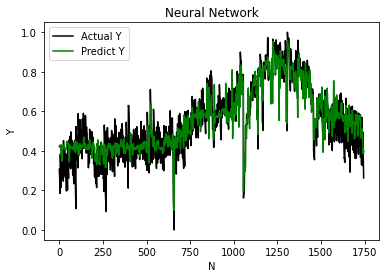

22 o'clock -> r2: 0.803


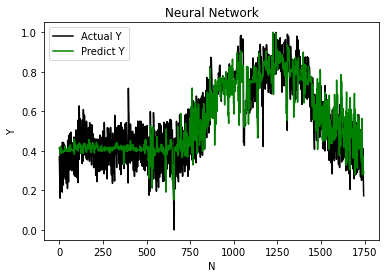

23 o'clock -> r2: 0.751


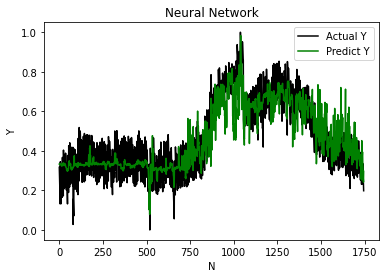

In [20]:
#r-squared analysis
for i in range(24):
  train_data_set = train_data_sets[train_data_sets['DateTime'] == i]
  train_x = train_data_set[features].values.reshape(-1, len(features))
  train_y = train_data_set[target].values.reshape(-1,len(target))

  scaled_x = scalers_x[i].transform(train_x)
  scaled_y = scalers_y[i].transform(train_y)

  model = models[i]

  p = model.predict(scaled_x)
  
  print("{} o'clock -> r2: {:.3f}".format(i, r2_score(scaled_y, p)))
  plt.plot(scaled_y, color="black", label="Actual Y")
  plt.plot(p, color="green", label="Predict Y")
  plt.title("Neural Network")
  plt.xlabel('N')
  plt.ylabel('Y')
  plt.legend()
  plt.show()

In [22]:
#predict remaining 2022

for i, data in test_data_sets.iterrows():
  t = int(data['DateTime'])
  test_x = np.array([[data['X1'],data['X2'],data['X3'],data['X4']]])

  scaler_x = scalers_x[t]
  scaler_y = scalers_y[t]
  model = models[t]

  scaled_x = scaler_x.transform(test_x)

  result = model.predict(scaled_x)
  result = scaler_y.inverse_transform(result)
  test_data_sets.at[i,'Y'] = result
  #print("{} o'clock: {} -> {}".format(t, test_x, result))
test_data_sets

,DateTime,X1,X2,X3,X4,Y
0,4,5.943333,17.72,0.1001,0.1690,381611.12500
1,4,5.990000,17.68,0.1092,0.1872,383727.18750
2,5,5.993333,17.66,0.1235,0.1014,396198.90625
3,5,6.000000,17.68,0.0949,0.1690,396618.96875
4,5,6.013333,17.68,0.1326,0.1300,397572.34375
...,...,...,...,...,...,...
10479,23,2.336667,13.48,0.0520,0.1248,493005.40625
10480,23,2.315667,13.52,0.0663,0.1209,492487.93750
10481,23,2.300000,13.56,0.1092,0.0962,491179.46875
10482,23,2.252667,13.60,0.0858,0.1157,491727.78125


In [ ]:
#save module
for i in range(24):
    model = models[i]
    model.save('{}.h5'.format(i))


In [23]:
#save result of prediction
test_data_sets.to_csv('result.csv')

0 o'clock -> r2: 0.086


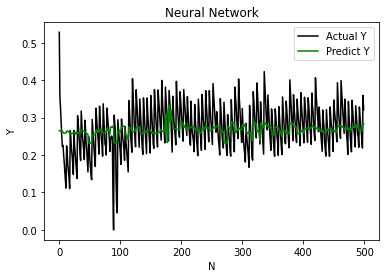

1 o'clock -> r2: 0.082


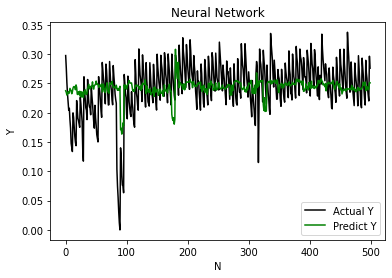

2 o'clock -> r2: 0.080


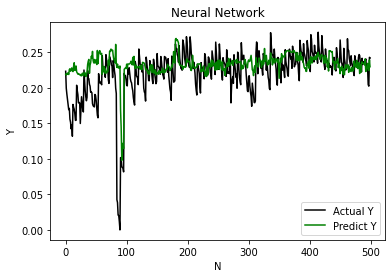

3 o'clock -> r2: 0.135


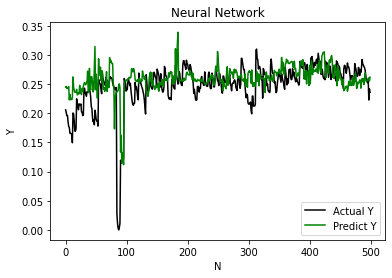

4 o'clock -> r2: 0.202


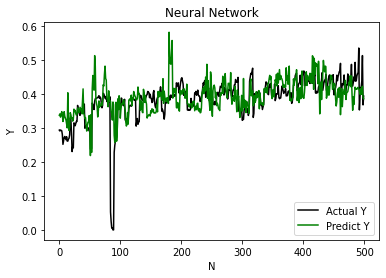

5 o'clock -> r2: 0.095


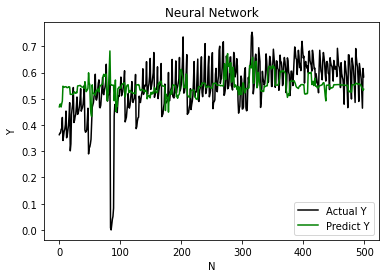

6 o'clock -> r2: 0.643


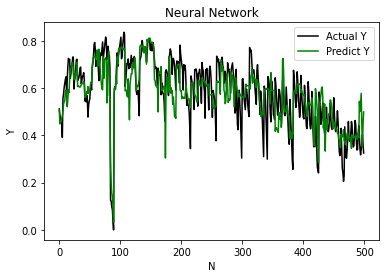

7 o'clock -> r2: 0.655


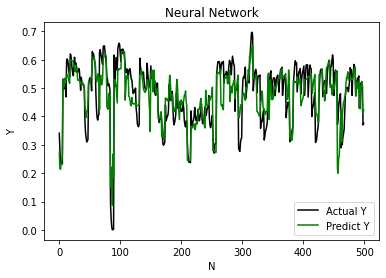

8 o'clock -> r2: 0.771


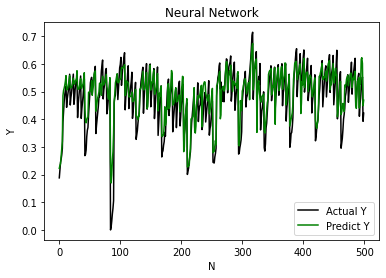

9 o'clock -> r2: 0.845


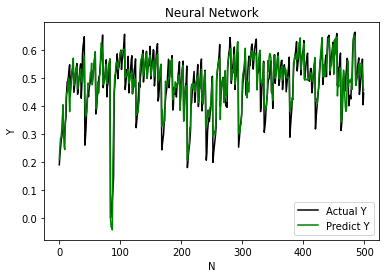

10 o'clock -> r2: 0.726


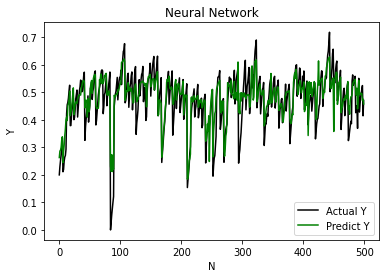

11 o'clock -> r2: 0.736


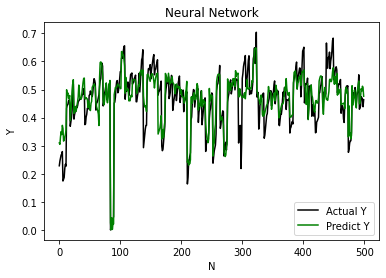

12 o'clock -> r2: 0.697


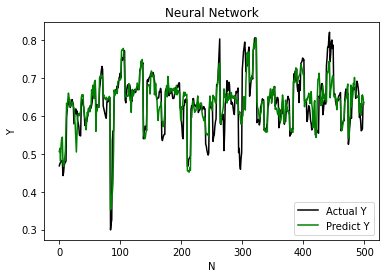

13 o'clock -> r2: 0.506


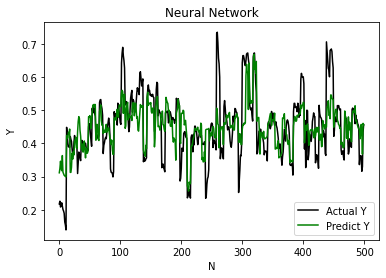

14 o'clock -> r2: 0.727


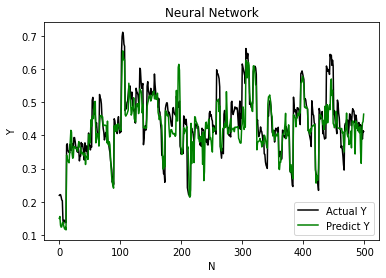

15 o'clock -> r2: 0.708


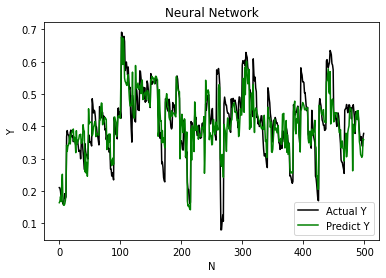

16 o'clock -> r2: 0.822


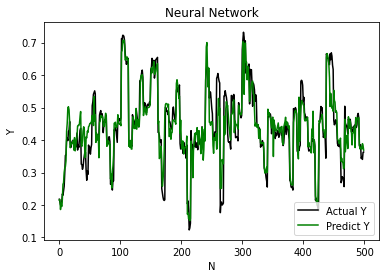

17 o'clock -> r2: 0.781


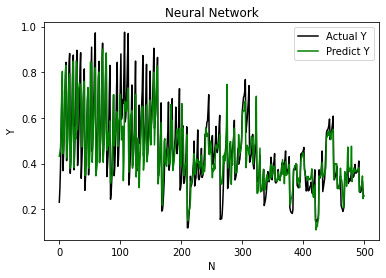

18 o'clock -> r2: 0.836


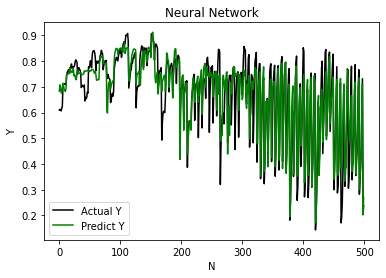

19 o'clock -> r2: 0.198


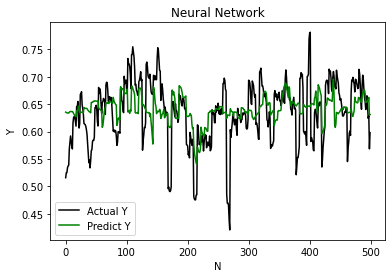

20 o'clock -> r2: 0.114


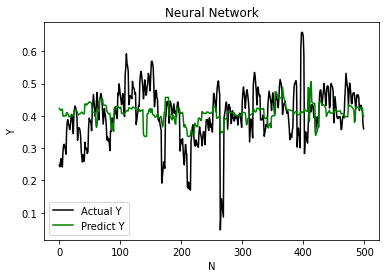

21 o'clock -> r2: 0.123


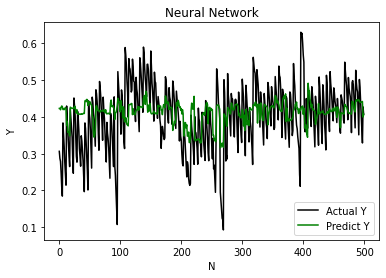

22 o'clock -> r2: 0.043


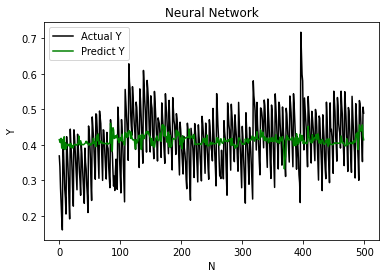

23 o'clock -> r2: 0.041


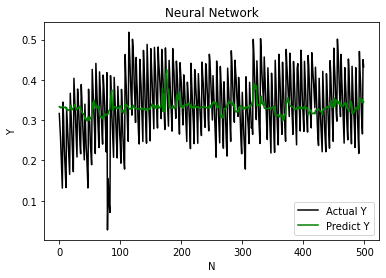

In [24]:
#r-squared analysis for fewer dataset
for i in range(24):
  train_data_set = train_data_sets[train_data_sets['DateTime'] == i]
  train_x = train_data_set[features].values.reshape(-1, len(features))[:500]
  train_y = train_data_set[target].values.reshape(-1,len(target))[:500]

  scaled_x = scalers_x[i].transform(train_x)
  scaled_y = scalers_y[i].transform(train_y)

  model = models[i]

  p = model.predict(scaled_x)
  
  print("{} o'clock -> r2: {:.3f}".format(i, r2_score(scaled_y, p)))
  plt.plot(scaled_y, color="black", label="Actual Y")
  plt.plot(p, color="green", label="Predict Y")
  plt.title("Neural Network")
  plt.xlabel('N')
  plt.ylabel('Y')
  plt.legend()
  plt.show()

0 o'clock


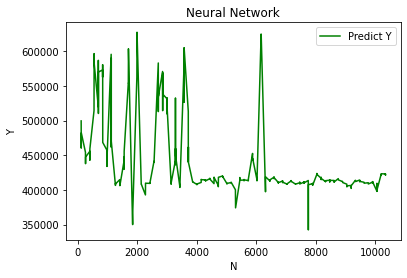

1 o'clock


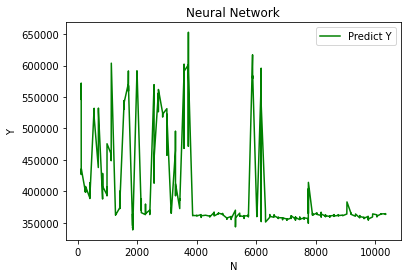

2 o'clock


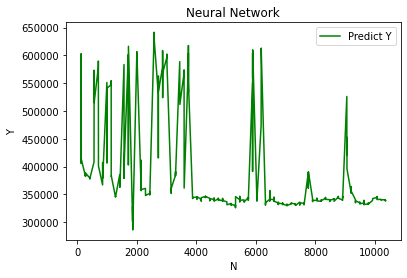

3 o'clock


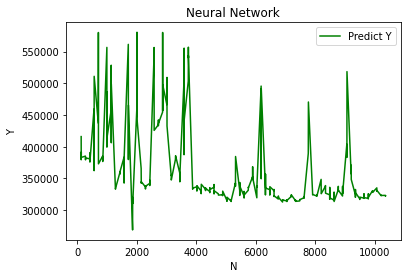

4 o'clock


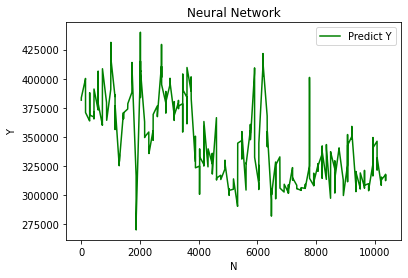

5 o'clock


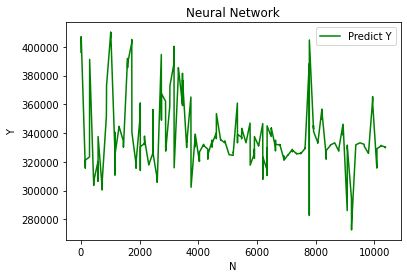

6 o'clock


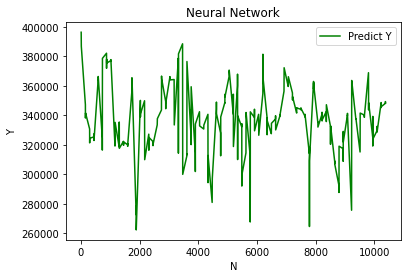

7 o'clock


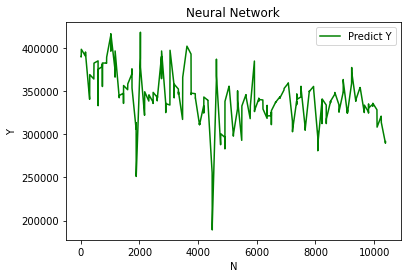

8 o'clock


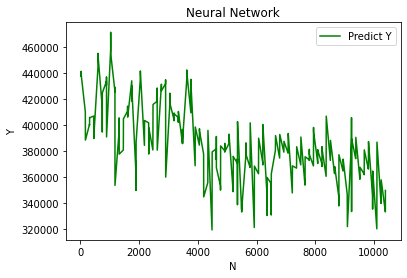

9 o'clock


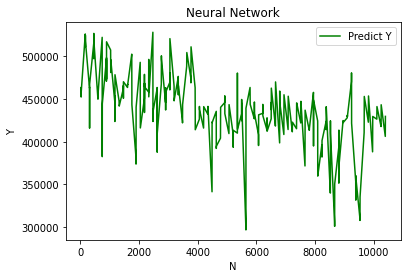

10 o'clock


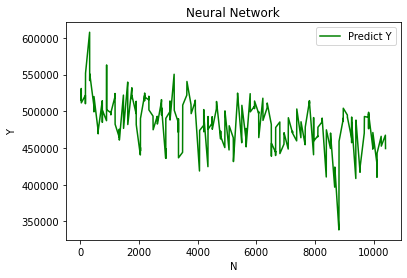

11 o'clock


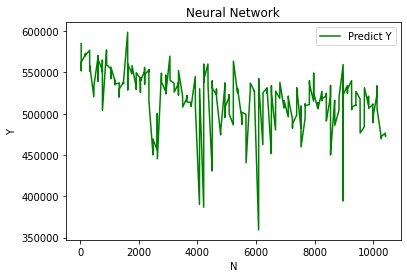

12 o'clock


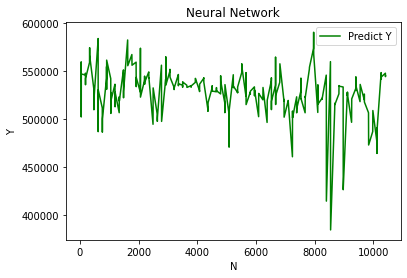

13 o'clock


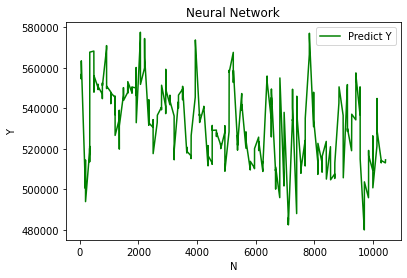

14 o'clock


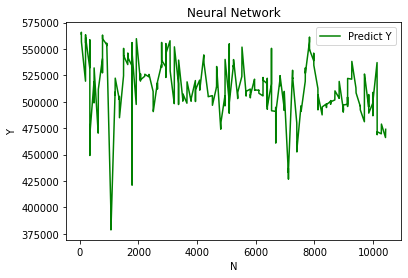

15 o'clock


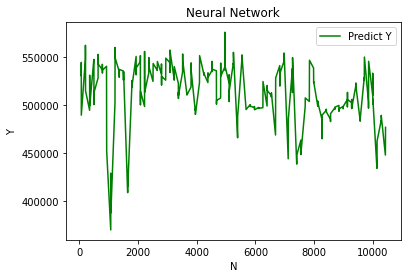

16 o'clock


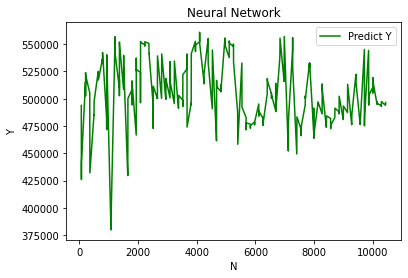

17 o'clock


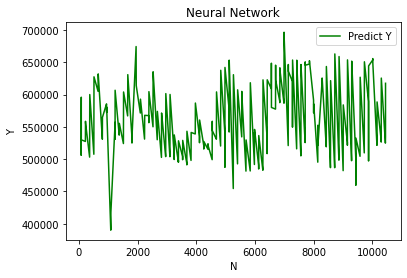

18 o'clock


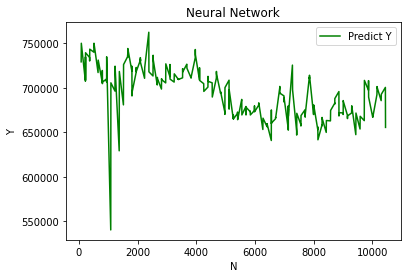

19 o'clock


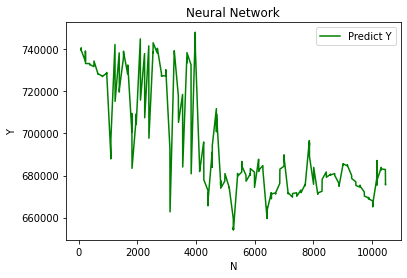

20 o'clock


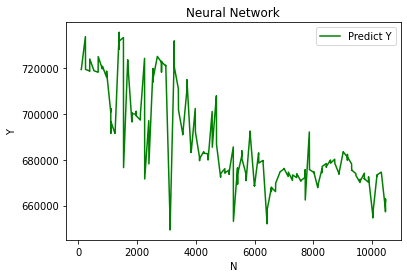

21 o'clock


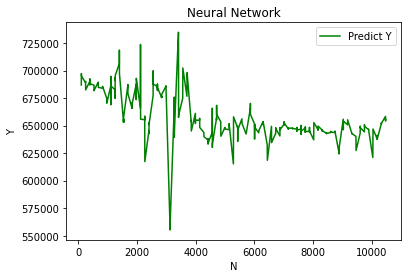

22 o'clock


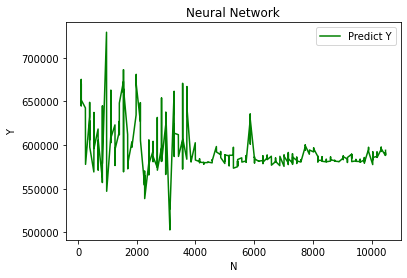

23 o'clock


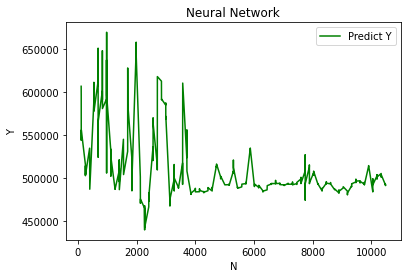

In [28]:
#display predicted values in graph
for i in range(24):
  test_data_set = test_data_sets[test_data_sets['DateTime'] == i]

  p = test_data_set['Y']
  
  print("{} o'clock".format(i))
  plt.plot(p, color="green", label="Predict Y")
  plt.title("Neural Network")
  plt.xlabel('N')
  plt.ylabel('Y')
  plt.legend()
  plt.show()

0 o'clock


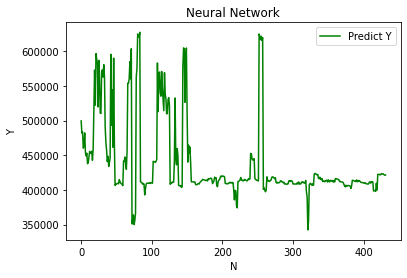

1 o'clock


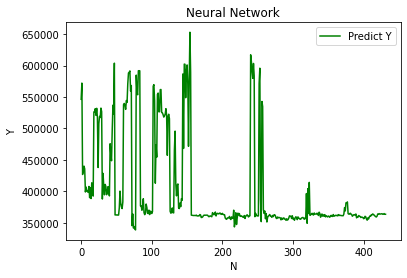

2 o'clock


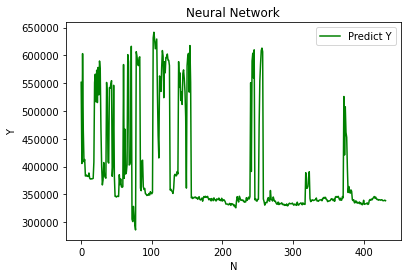

3 o'clock


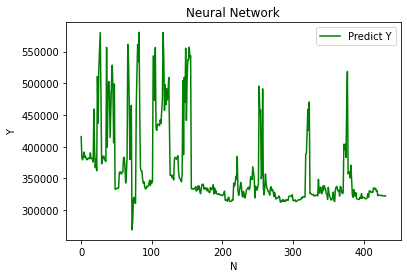

4 o'clock


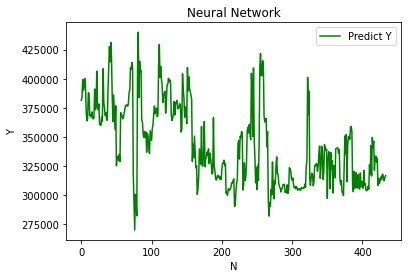

5 o'clock


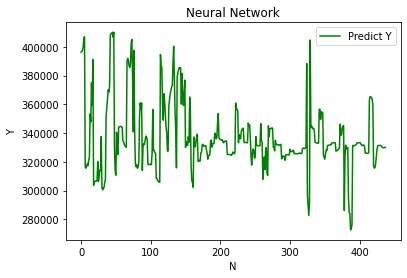

6 o'clock


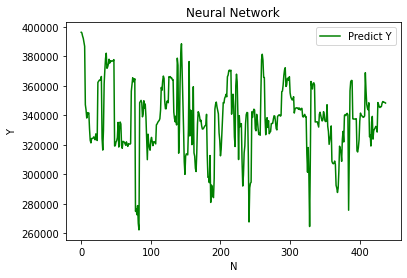

7 o'clock


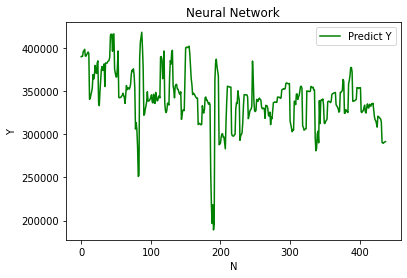

8 o'clock


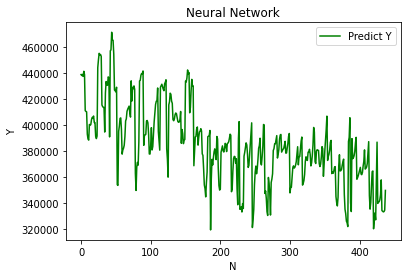

9 o'clock


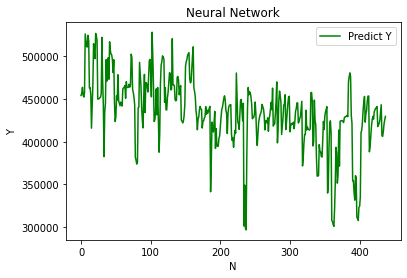

10 o'clock


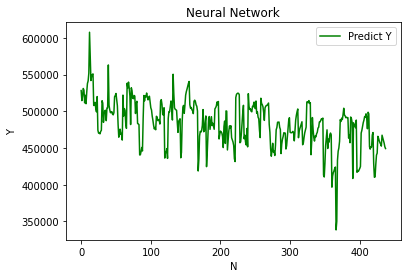

11 o'clock


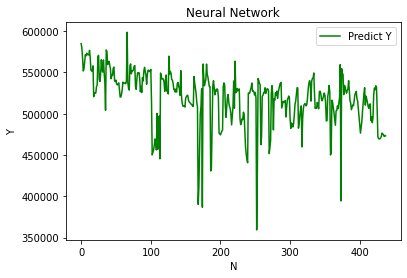

12 o'clock


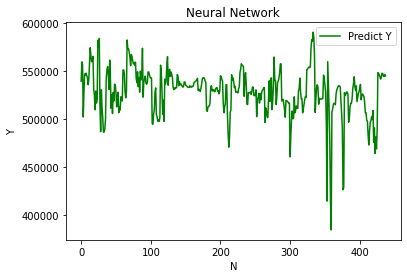

13 o'clock


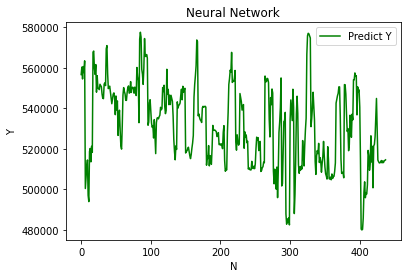

14 o'clock


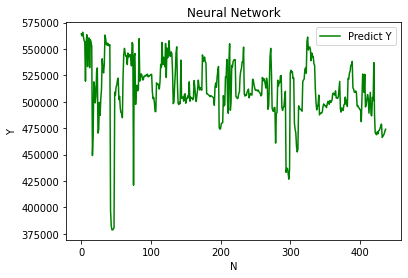

15 o'clock


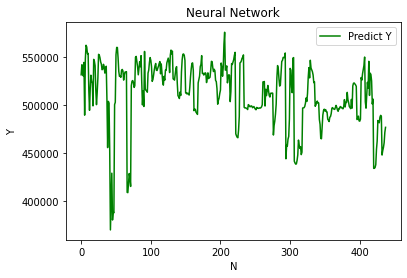

16 o'clock


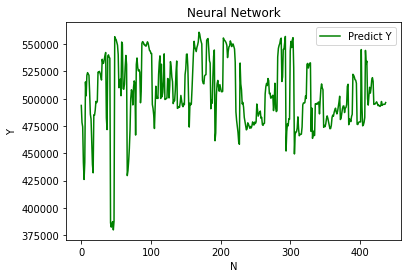

17 o'clock


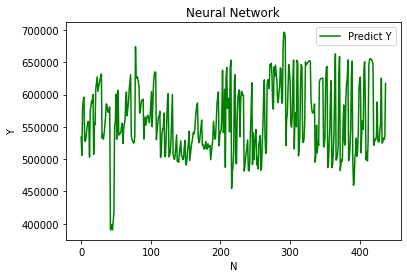

18 o'clock


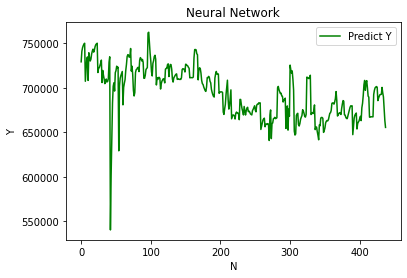

19 o'clock


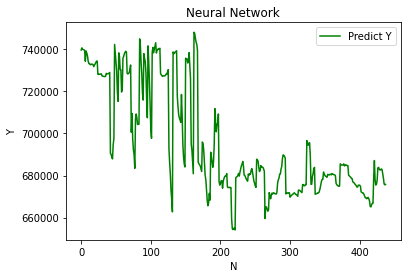

20 o'clock


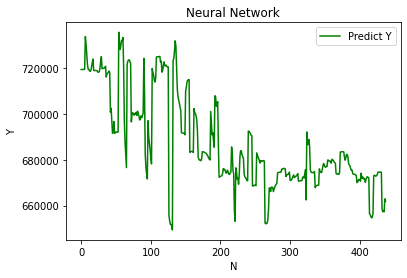

21 o'clock


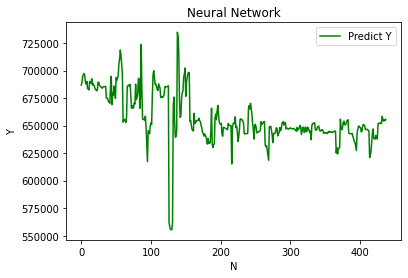

22 o'clock


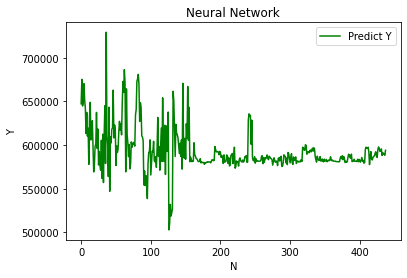

23 o'clock


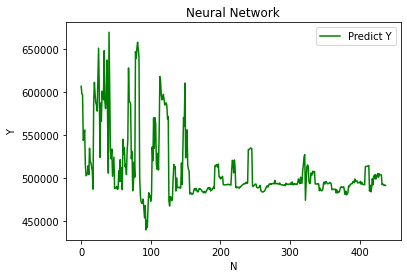

In [30]:
for i in range(24):
    test_data_set = test_data_sets[test_data_sets['DateTime'] == i]
    test_x = test_data_set[features].values.reshape(-1,len(features))
    
    scaled_x = scalers_x[i].transform(test_x)

    model = models[i]

    p = model.predict(scaled_x)
    p = scalers_y[i].inverse_transform(p)
    print("{} o'clock".format(i))
    plt.plot(p, color="green", label="Predict Y")
    plt.title("Neural Network")
    plt.xlabel('N')
    plt.ylabel('Y')
    plt.legend()
    plt.show()